In [ ]:
# Data can be downloaded from Kaggle: https://www.kaggle.com/competitions/titanic/data
# or Stanford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

In [883]:
titanic_train = pd.read_csv('C:/Users/sandy/Development/Datasets/Titanic/train.csv')
titanic_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [882]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [886]:
cabin_check = titanic_train[['Ticket','Fare','Cabin']]
cabin_check

,Ticket,Fare,Cabin
0,A/5 21171,7.2500,NaN
1,PC 17599,71.2833,C85
2,STON/O2. 3101282,7.9250,NaN
3,113803,53.1000,C123
4,373450,8.0500,NaN
...,...,...,...
886,211536,13.0000,NaN
887,112053,30.0000,B42
888,W./C. 6607,23.4500,NaN
889,111369,30.0000,C148


In [909]:
s = cabin_check['Cabin'].str.split('', expand=True)
cabin_check['Deck'] = s.loc[:,1]
cabin_check

<ipython-input-909-7dfbb07d6725>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin_check['Deck'] = s.loc[:,1]


,Ticket,Fare,Cabin,Deck
0,A/5 21171,7.2500,NaN,NaN
1,PC 17599,71.2833,C85,C
2,STON/O2. 3101282,7.9250,NaN,NaN
3,113803,53.1000,C123,C
4,373450,8.0500,NaN,NaN
...,...,...,...,...
886,211536,13.0000,NaN,NaN
887,112053,30.0000,B42,B
888,W./C. 6607,23.4500,NaN,NaN
889,111369,30.0000,C148,C


In [914]:
cabin_check.dropna(inplace=True)
cabin_check

<ipython-input-914-c11cc3144bd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cabin_check.dropna(inplace=True)


,Ticket,Fare,Cabin,Deck
1,PC 17599,71.2833,C85,C
3,113803,53.1000,C123,C
6,17463,51.8625,E46,E
10,PP 9549,16.7000,G6,G
11,113783,26.5500,C103,C
...,...,...,...,...
871,11751,52.5542,D35,D
872,695,5.0000,B51 B53 B55,B
879,11767,83.1583,C50,C
887,112053,30.0000,B42,B


In [915]:
cabin_check['Deck'].uniqueque()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<AxesSubplot:xlabel='Deck', ylabel='Fare'>

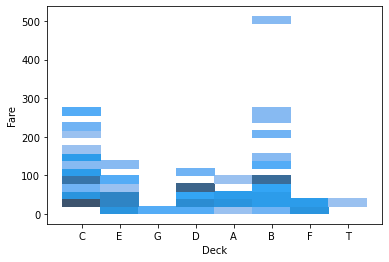

In [918]:
sns.histplot(x='Deck', y='Fare', data=cabin_check)

Key : A Mean:  39.623886666666664 Median:  35.5


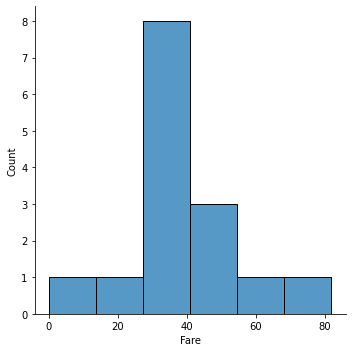

Key : B Mean:  113.50576382978724 Median:  80.0


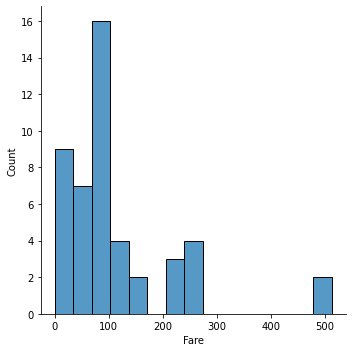

Key : C Mean:  100.15134067796612 Median:  83.475


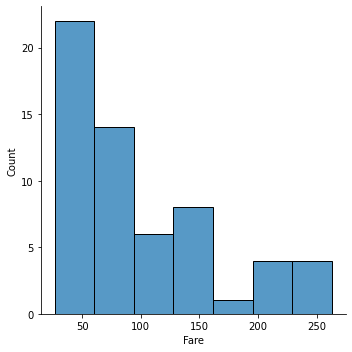

Key : D Mean:  57.24457575757576 Median:  53.1


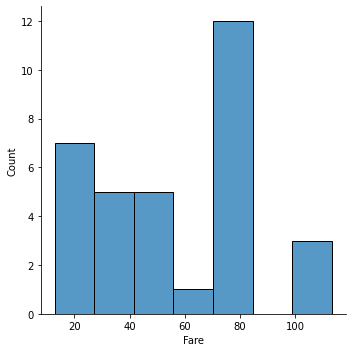

Key : E Mean:  46.026693749999986 Median:  45.18125


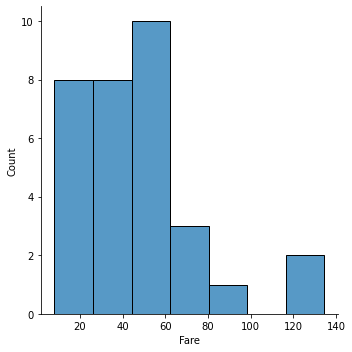

Key : F Mean:  18.69679230769231 Median:  13.0


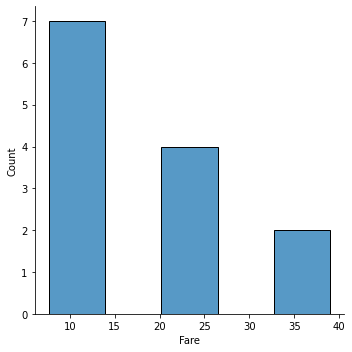

Key : G Mean:  13.58125 Median:  13.58125


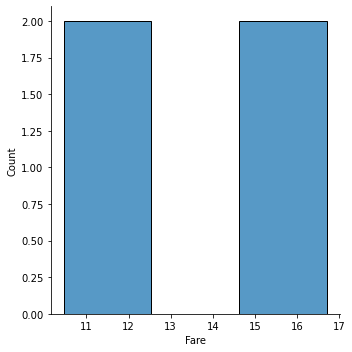

Key : T Mean:  35.5 Median:  35.5


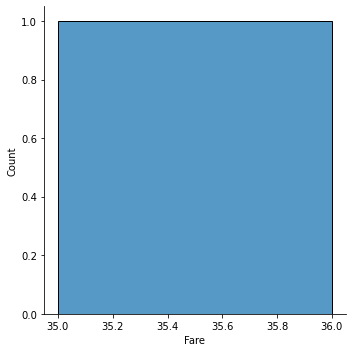

In [929]:
for key, sub_df in cabin_check.groupby('Deck'):
    print('Key :', key, 'Mean: ', sub_df['Fare'].mean(), 'Median: ', sub_df['Fare'].median())
    sns.displot(sub_df['Fare'])
    plt.show()

<AxesSubplot:>

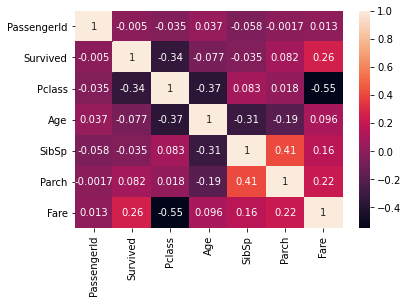

In [931]:
sns.heatmap(titanic_train.corr(), annot=True)

<AxesSubplot:>

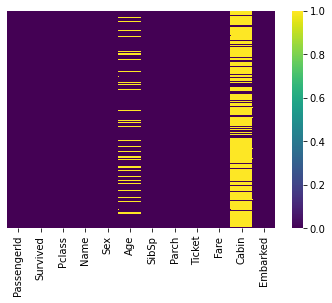

In [934]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cmap='viridis')

In [937]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

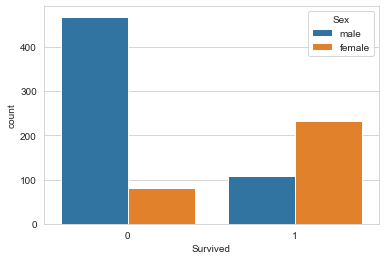

In [941]:
sns.set_style(style='whitegrid')
sns.countplot(x='Survived', data=titanic_train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

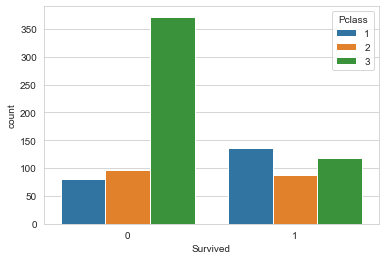

In [942]:
sns.countplot(x='Survived', data=titanic_train, hue='Pclass')

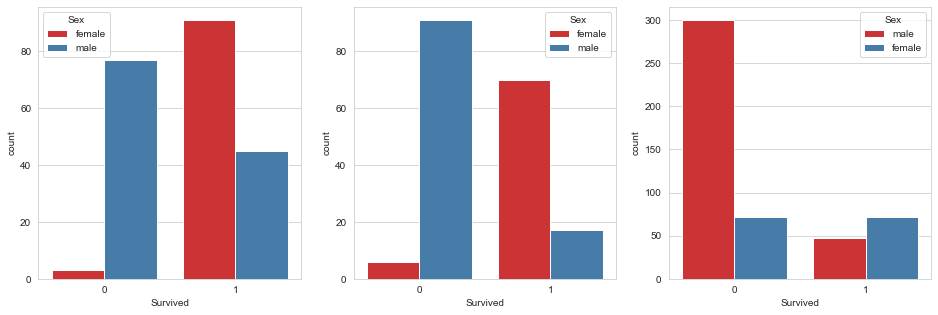

In [955]:
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.countplot(x='Survived', data=titanic_train[titanic_train['Pclass']==1], hue='Sex', palette='Set1')
plt.subplot(132)
sns.countplot(x='Survived', data=titanic_train[titanic_train['Pclass']==2], hue='Sex', palette='Set1')
plt.subplot(133)
sns.countplot(x='Survived', data=titanic_train[titanic_train['Pclass']==3], hue='Sex', palette='Set1')
plt.show()

<AxesSubplot:xlabel='Age'>

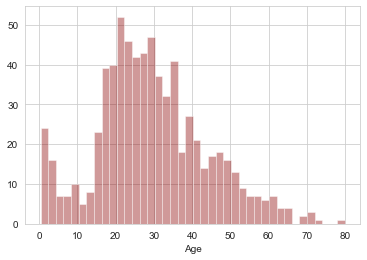

In [972]:
sns.distplot(titanic_train['Age'].dropna(), kde=False, color='darkred', bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

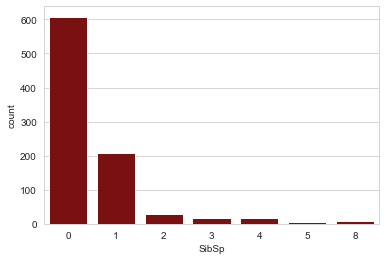

In [962]:
sns.countplot(x=titanic_train['SibSp'], color='darkred')

<AxesSubplot:xlabel='Fare'>

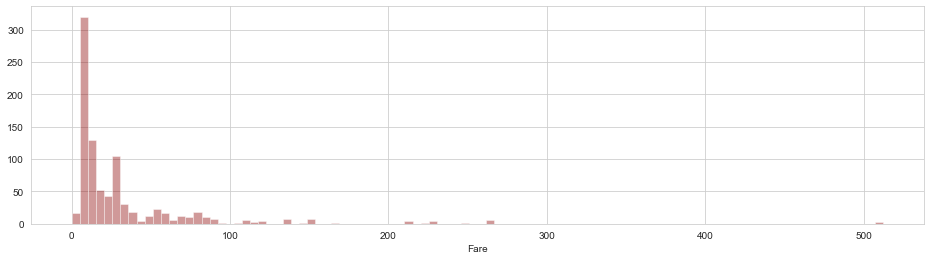

In [969]:
plt.figure(figsize=(16,4))
sns.distplot(titanic_train['Fare'].dropna(), kde=False, color='darkred', bins=100)

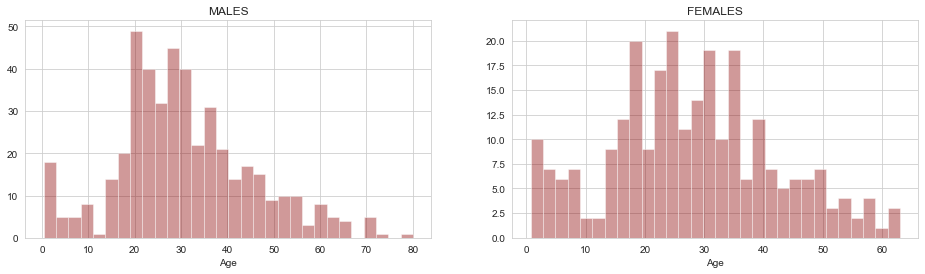

In [976]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.distplot(titanic_train['Age'][titanic_train['Sex']=='male'].dropna(), kde=False, color='darkred', bins=30)
plt.title('MALES')
plt.subplot(122)
sns.distplot(titanic_train['Age'][titanic_train['Sex']=='female'].dropna(), kde=False, color='darkred', bins=30)
plt.title('FEMALES')
plt.show()

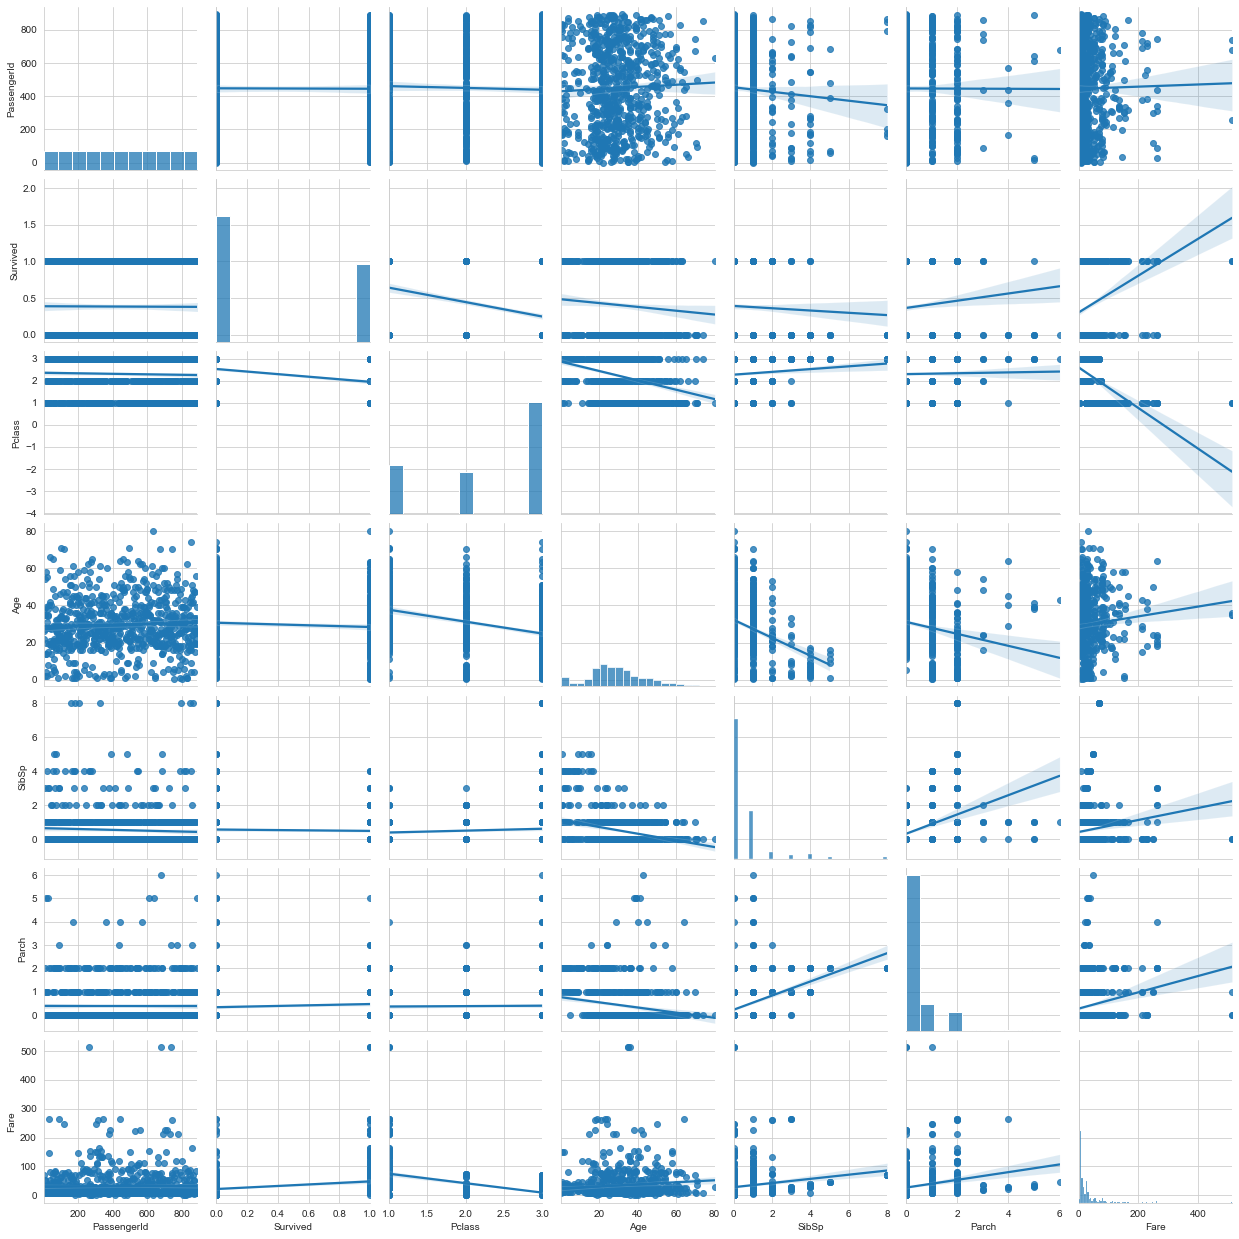

In [979]:
sns.pairplot(titanic_train, kind='reg')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

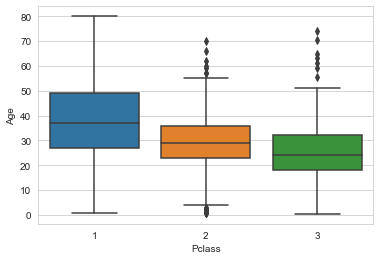

In [983]:
sns.boxplot(x='Pclass', y='Age', data=titanic_train)

In [984]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [985]:
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

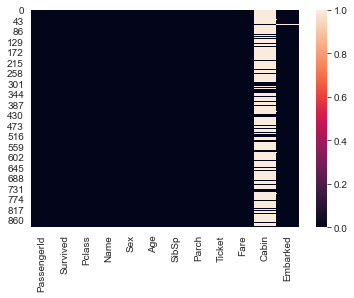

In [987]:
sns.heatmap(titanic_train.isnull())

In [988]:
titanic_train.drop(labels='Cabin', axis=1, inplace=True)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [997]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)
embarked = pd.get_dummies(titanic_train['Embarked'], drop_first=True)
titanic_train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [998]:
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [1000]:
titanic_train = pd.concat([titanic_train, sex, embarked], axis=1)
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [1023]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(titanic_train.drop('Survived', axis=1), 
                                                    titanic_train['Survived'], test_size=0.3, random_state=1)
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

In [1032]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       153
           1       0.77      0.70      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[129  24]
 [ 35  80]]
0.7798507462686567
